In [258]:
import tensorflow as tf
keras = tf.keras
from keras import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [239]:
train_df = pd.read_csv("train.csv")
full_test_df = pd.read_csv("test.csv")
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [240]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [241]:
train_df.dropna(inplace=True)
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [242]:
train_df.drop(["PassengerId", "Name"], axis=1, inplace=True)
test_df = full_test_df.drop(["PassengerId", "Name"], axis=1)
train_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


In [243]:
le = LabelEncoder()
train_df["Transported"] = le.fit_transform(train_df["Transported"])

train_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0


In [244]:
oe = OrdinalEncoder()
train_df[["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]] = oe.fit_transform(train_df[["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]])
test_df[["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]] = oe.fit_transform(test_df[["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]])

train_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,137.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1823.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0


In [245]:
X_train = train_df.drop(["Transported"], axis=1)
y_train = train_df["Transported"]

In [246]:
model = Sequential([
    # InputLayer(X_train.shape[1], name="IL"),
    Dense(128, activation="relu", name="HL1", input_shape=(X_train.shape[1],)),
    Dense(64, activation="relu", name="HL2"),
    Dense(32, activation="relu", name="HL3"),
    Dense(1, activation="sigmoid", name="OL"),
])
model.summary()

Model: "sequential_10"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 128)               1536      
                                                                 
 HL2 (Dense)                 (None, 64)                8256      
                                                                 
 HL3 (Dense)                 (None, 32)                2080      
                                                                 
 OL (Dense)                  (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [247]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [248]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,137.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1823.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0
3,1.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,0.0,0.0,1825.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,134.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,1.0,4293.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,4298.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0
8691,1.0,0.0,1778.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0


In [249]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/50
186/186 [==============================] - 4s 10ms/step - loss: 5.6994 - accuracy: 0.6895 - val_loss: 2.4594 - val_accuracy: 0.7610
Epoch 2/50
186/186 [==============================] - 2s 10ms/step - loss: 2.1983 - accuracy: 0.7272 - val_loss: 2.3793 - val_accuracy: 0.6611
Epoch 3/50
186/186 [==============================] - 2s 10ms/step - loss: 1.7635 - accuracy: 0.7251 - val_loss: 1.4572 - val_accuracy: 0.7625
Epoch 4/50
186/186 [==============================] - 2s 13ms/step - loss: 1.7526 - accuracy: 0.7238 - val_loss: 1.1451 - val_accuracy: 0.7277
Epoch 5/50
186/186 [==============================] - 2s 10ms/step - loss: 1.3960 - accuracy: 0.7290 - val_loss: 1.6251 - val_accuracy: 0.7579
Epoch 6/50
186/186 [==============================] - 2s 11ms/step - loss: 1.2083 - accuracy: 0.7371 - val_loss: 1.0659 - val_accuracy: 0.7504
Epoch 7/50
186/186 [==============================] - 2s 13ms/step - loss: 0.9936 - accuracy: 0.7437 - val_loss: 0.9133 - val_accuracy: 0.7080

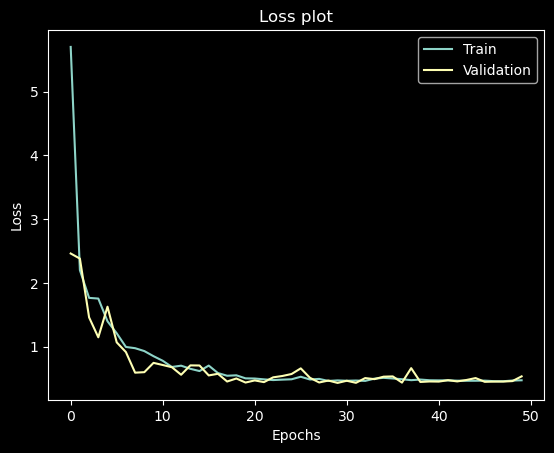

In [250]:
plt.plot(range(50), hist.history["loss"], label="Train")
plt.plot(range(50), hist.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss plot")
plt.legend()

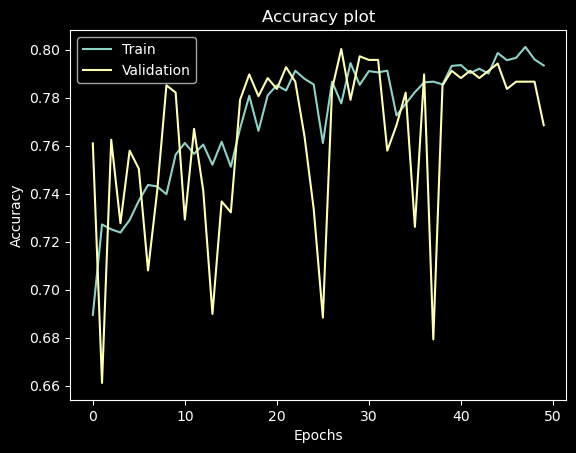

In [251]:
plt.plot(range(50), hist.history["accuracy"], label="Train")
plt.plot(range(50), hist.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()

In [252]:
y_pred = model.predict(test_df)

134/134 [==============================] - 0s 3ms/step


In [253]:
labels = np.where(y_pred > 0.5, True, False)
labels

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [254]:
res = pd.DataFrame({"PassengerId": full_test_df["PassengerId"], "Transported": labels.flatten()})
res

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [255]:
res.to_csv("./submission.csv", index=False)

In [256]:
model.save("./model.keras")

In [257]:
full_test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [259]:
with open("./encoder.p", "wb") as f:
    pickle.dump(oe, f)